# 在约会网站上使用KNN
## 从文本文件中解析数据
### 将文本记录转换为Numpy的解析程序

In [8]:
import numpy as np
from KNN import classify0

def file2matrix(filename):
    """
    将文本记录转换为numpy
    参数：
        filename -- 文件名
    返回：
        returnMat -- 转换的矩阵
        classLabelVector -- 类标签向量
    """
    #打开文件
    fr = open(filename)
    #一行一行读
    arrayOLines = fr.readlines()
    #求行数
    numberOfLines = len(arrayOLines)
    #为返回矩阵和标签向量预分配空间
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    classifiedData = {'didntLike ':[], 'smallDoses':[], 'largeDoses':[]}
    index = 0
    for line in arrayOLines:
        #str.strip()去掉每行前后的空格
        line = line.strip()
        #按制表符'\t'分割
        listFromLine = line.split('\t')
        #把数据中的前三项（特征数据）放在数据矩阵对应行中
        returnMat[index, :] = listFromLine[0:3]
        #把数据中的倒数第一项（标签）添加到标签向量中
        classLabelVector.append(np.uint32(listFromLine[-1]))
        #把数据分类添加到分类数据集中
        classifiedData[listFromLine[-2]].append(np.array(listFromLine[0:3]))
        #序号+1，这里使用序号++的形式是因为执行循环的次数是由行数决定的
        index += 1
    classifiedData['didntLike '] = np.array(classifiedData['didntLike '])
    classifiedData['smallDoses'] = np.array(classifiedData['smallDoses'])
    classifiedData['largeDoses'] = np.array(classifiedData['largeDoses'])
    return returnMat, classLabelVector, classifiedData

## 导入数据

In [2]:
datingDataMat, datingLabels, classifiedData = file2matrix('datingTestSet.txt')

## 分析数据
### 使用Matplotlib创建散点图

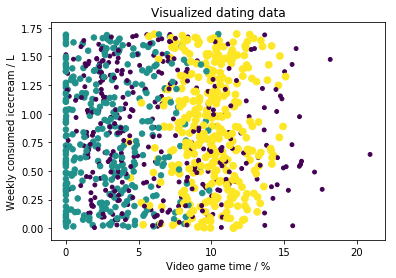

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.title("Visualized dating data")
plt.xlabel("Video game time / %")
plt.ylabel("Weekly icecream consumption/ L")

### 分类更明显的散点图

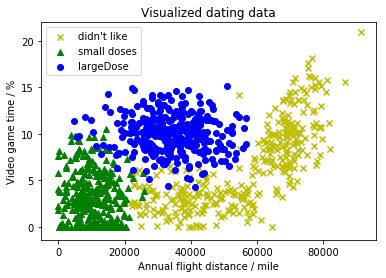

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(classifiedData['didntLike '][:, 0], classifiedData['didntLike '][:, 1], marker = 'x', color = 'y')
ax.scatter(classifiedData['smallDoses'][:, 0], classifiedData['smallDoses'][:, 1], marker = '^', color = 'g')
ax.scatter(classifiedData['largeDoses'][:, 0], classifiedData['largeDoses'][:, 1], marker = 'o', color = 'b')
plt.legend(("didn't like", "small doses", "largeDose"))
plt.title("Visualized dating data")
plt.xlabel("Annual flight distance / mile")
plt.ylabel("Video game time / %")

## 归一化特征值
### 归一化函数

In [6]:
def autoNorm(dataSet):
    """
    归一化特征值
    归一化到区间[0, 1]
    参数：
        dataSet -- 数据集
    返回：
        normDataSet -- 归一化后的数据集
        range -- 极差
        minVals -- 最小值
    """
    #求数据集最大最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #最大值-最小值=极差
    ranges = maxVals - minVals
    normDataSet = np.zeros_like(dataSet)
    #求数据集大小
    m = dataSet.shape[0]
    #(数据集-最小值)/极差，归一化
    #其实这里也可以不用np.tile()，用Python广播的性质，但是可读性如这个强
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

### 调用函数

In [46]:
normMat, ranges, minVals = autoNorm(datingDataMat)
print("归一化后的数据：\n{}".format(normMat))
print("极差 = {}".format(ranges))
print("最小值 = {}".format(minVals))

归一化后的数据：
[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]
极差 = [  9.12730000e+04   2.09193490e+01   1.69436100e+00]
最小值 = [ 0.        0.        0.001156]


## 测试分类器
### 测试函数

In [4]:
def datingClassTest():
    #测试比例
    hoRatio = 0.10
    #读取数据
    datingDataMat, datingLabels, _ = file2matrix('datingTestSet.txt')
    #归一化数据
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #得到数据集大小
    m = normMat.shape[0]
    #求得测试数
    numTestVecs = np.int(m*hoRatio)
    #错误数记录
    errorCount = 0.0
    #遍历测试集
    for i in range(numTestVecs):
        #得到分类结果
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m],3)
        #打印预测结果
        print("The classifier came back with: {}, the real answer is: {}".format(classifierResult, datingLabels[i]))
        #统计错误
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    #打印正确率
    print("The accuracy is: {}".format(1 - errorCount/np.float(numTestVecs)))

### 测试结果

In [9]:
datingClassTest()

The classifier came back with: [3], the real answer is: 3
The classifier came back with: 2, the real answer is: 2
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [1], the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: [3], the real answer is: 3
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [3], the real answer is: 3
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [2], the real answer is: 2
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [1], the real answer is: 1
The classifier came back with: [1], the real answer is: 1
The classifier cam